This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


also [this](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

## Confirmed

In [3]:
# Import data & check it out
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [4]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
Albania,0,0,0,0,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
Algeria,0,0,0,0,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
Andorra,0,0,0,0,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [5]:
df = data_day.transpose()

In [6]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [7]:
data.loc[(data.value < 1),'value'] = None
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,NaN
1,Albania,1/22/20,NaN
2,Algeria,1/22/20,NaN
3,Andorra,1/22/20,NaN
4,Angola,1/22/20,NaN


In [8]:
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
3/9/20,4.0,2.0,20.0,1.0,NaN,NaN,12.0,1.0,91.0,131.0,...,1.0,45.0,322.0,NaN,NaN,NaN,30.0,19.0,NaN,NaN
4/1/20,237.0,259.0,847.0,390.0,8.0,7.0,1054.0,571.0,4862.0,10711.0,...,794.0,814.0,29865.0,338.0,181.0,143.0,218.0,134.0,36.0,8.0
4/2/20,273.0,277.0,986.0,428.0,8.0,9.0,1133.0,663.0,5116.0,11129.0,...,897.0,1024.0,34173.0,350.0,205.0,146.0,233.0,161.0,39.0,9.0
4/3/20,281.0,304.0,1171.0,439.0,8.0,15.0,1265.0,736.0,5330.0,11524.0,...,1072.0,1264.0,38689.0,369.0,227.0,153.0,237.0,194.0,39.0,9.0
4/4/20,299.0,333.0,1251.0,466.0,10.0,15.0,1451.0,770.0,5550.0,11781.0,...,1225.0,1505.0,42477.0,400.0,266.0,155.0,240.0,217.0,39.0,9.0


In [9]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [10]:
# Check out index
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-02', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-01',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-02', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
      

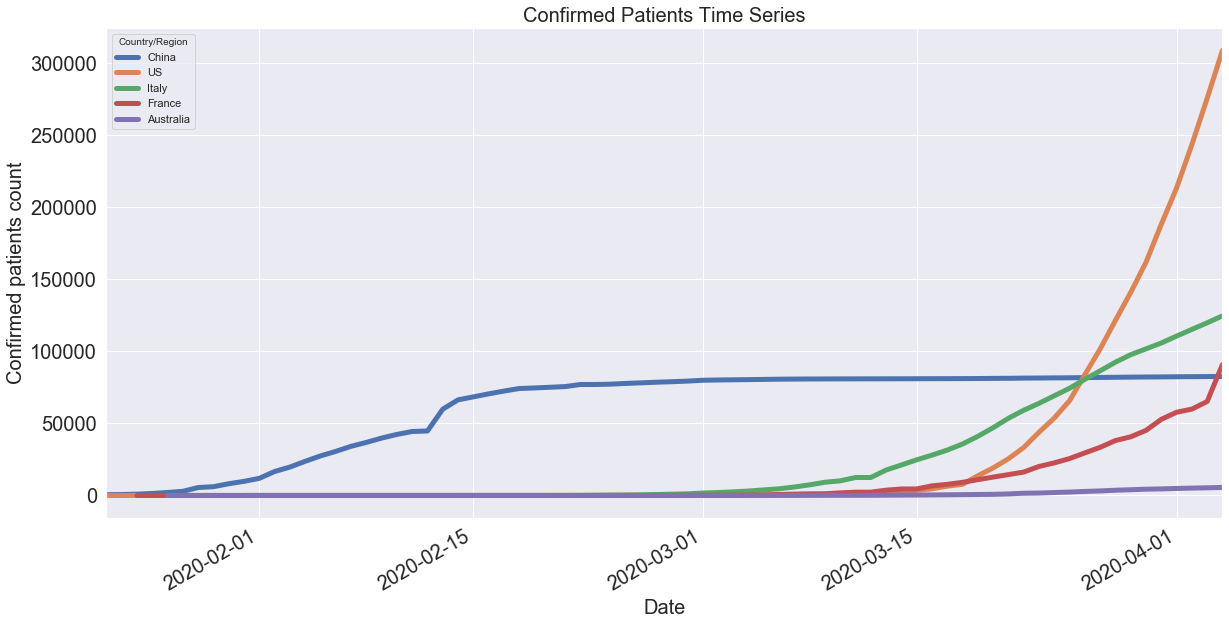

In [11]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed patients count', fontsize=20);
plt.title('Confirmed Patients Time Series', fontsize=20);

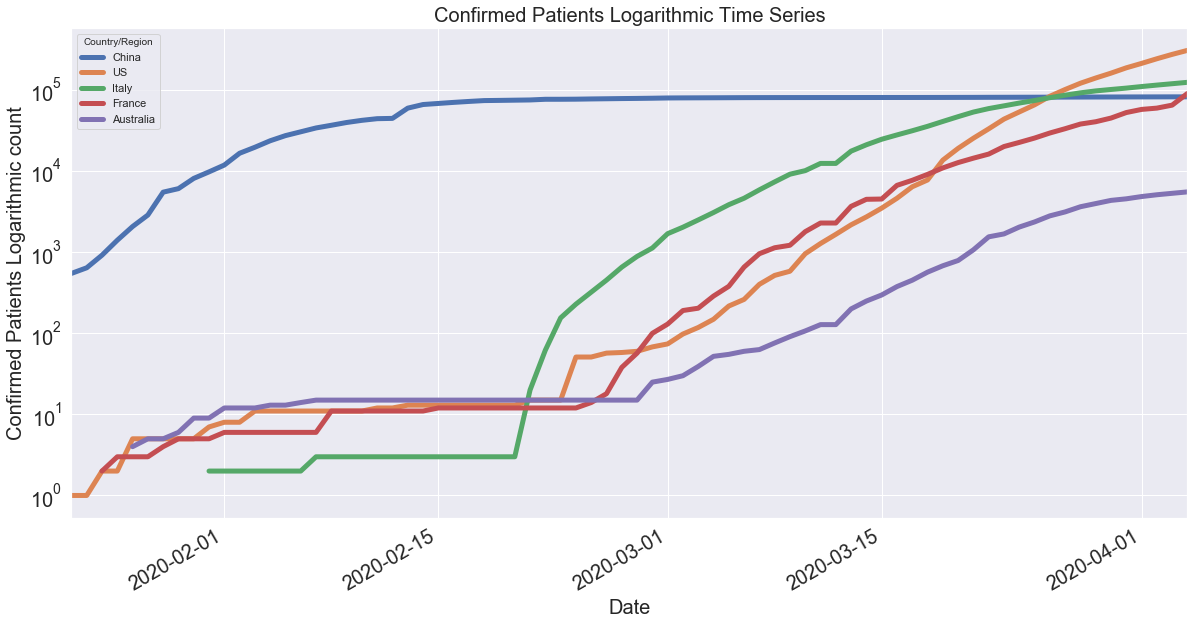

In [12]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20);
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20);

## Deaths

[This](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html) and [this](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

In [13]:
# Import data & check it out
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [14]:
# Group by region
data_day = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
#
data.loc[(data.value < 25),'value'] = None
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

In [15]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,58.0,NaN,NaN,NaN,28.0,NaN,NaN,146.0,...,NaN,NaN,2357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,86.0,NaN,NaN,NaN,36.0,NaN,NaN,158.0,...,NaN,NaN,2926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,105.0,NaN,NaN,NaN,39.0,NaN,28.0,168.0,...,27.0,NaN,3611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,130.0,NaN,NaN,NaN,43.0,NaN,30.0,186.0,...,32.0,NaN,4320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


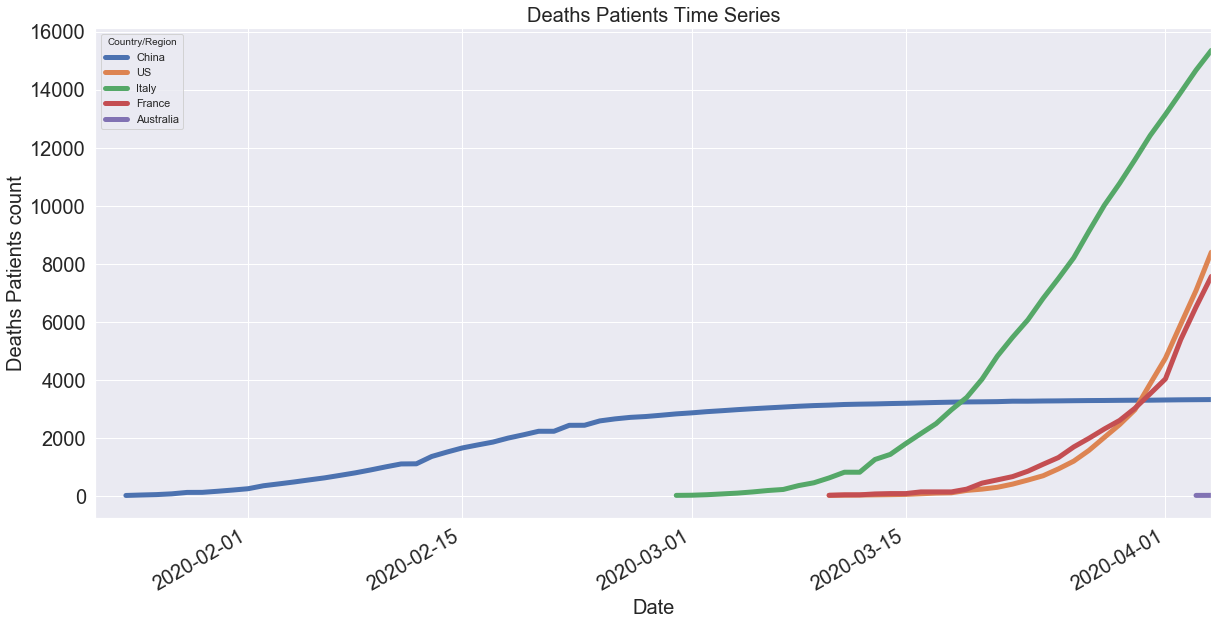

In [16]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

In [17]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,San Marino,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'], axis=1)
df1.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,San Marino,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())

Algeria 64
Argentina 69
Australia 72
Austria 62
Belgium 58
Brazil 60
Canada 61
Chile 73
China 2
Colombia 72
Czechia 69
Denmark 62
Dominican Republic 66
Ecuador 62
Egypt 65
Finland 73
France 48
Germany 56
Greece 64
Hungary 72
India 67
Indonesia 57
Iran 36
Iraq 62
Ireland 66
Israel 70
Italy 38
Japan 54
Korea, South 40
Luxembourg 70
Malaysia 65
Mexico 69
Morocco 66
Netherlands 55
Norway 67
Pakistan 69
Panama 69
Peru 69
Philippines 60
Poland 68
Portugal 62
Romania 65
Russia 71
San Marino 68
Saudi Arabia 72
Serbia 70
Spain 47
Sweden 61
Switzerland 55
Turkey 60
US 48
Ukraine 72
United Kingdom 54


In [20]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))

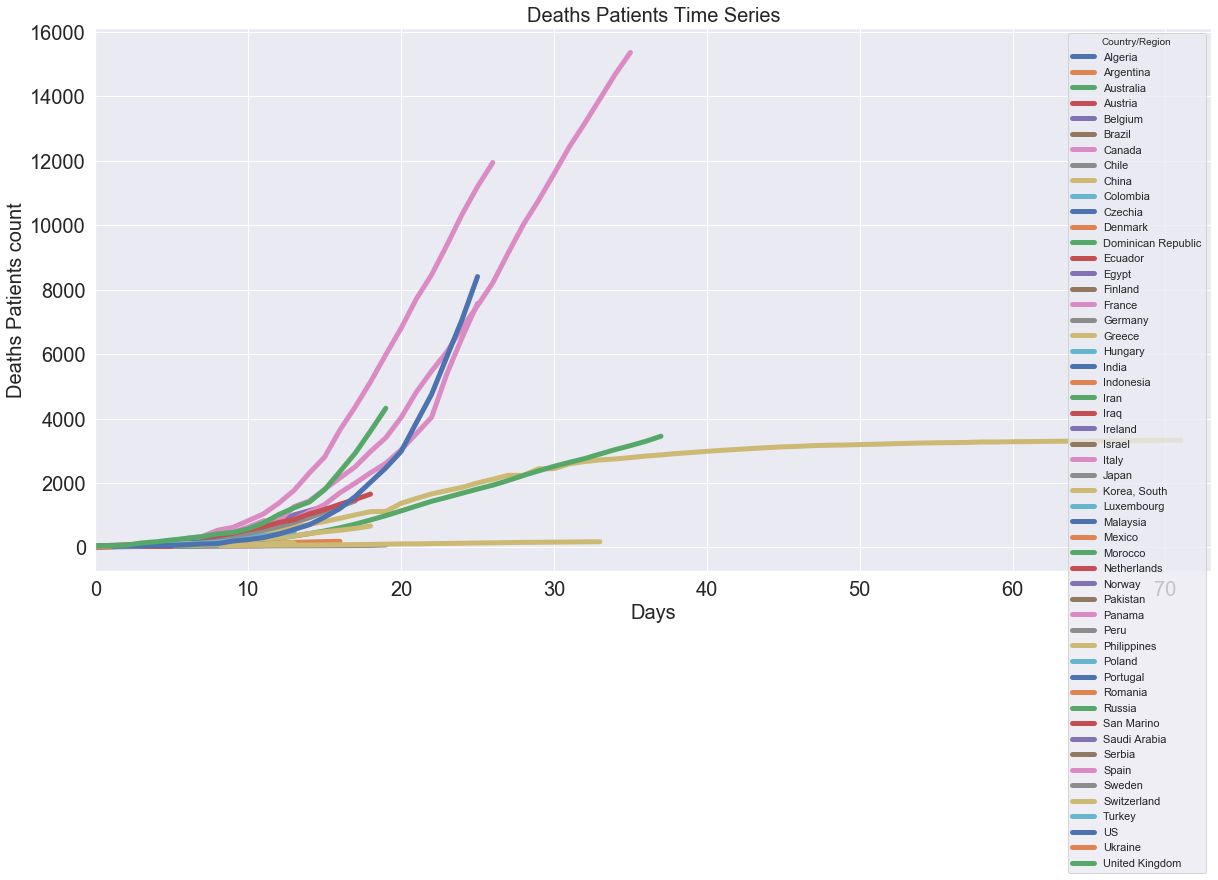

In [21]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

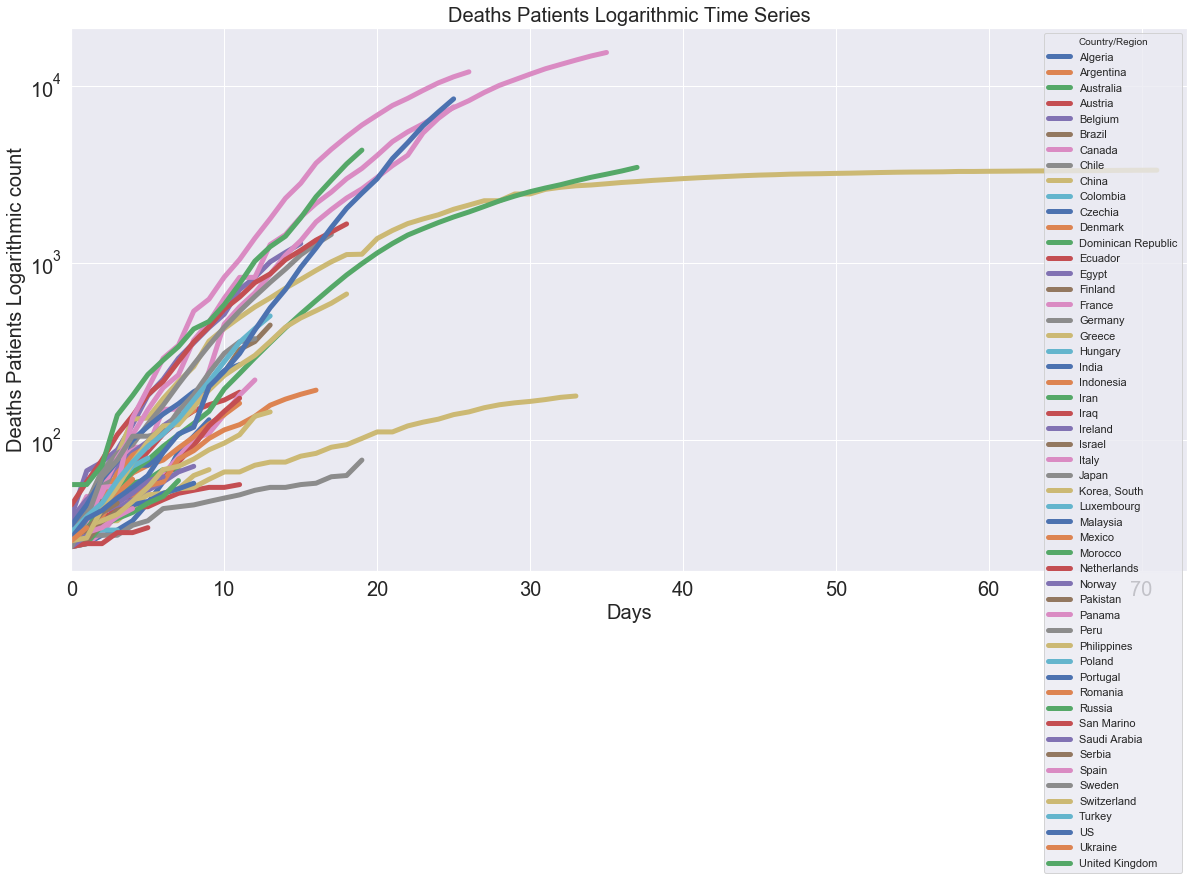

In [22]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients Logarithmic count', fontsize=20);
plt.title('Deaths Patients Logarithmic Time Series', fontsize=20);

## Functions

In [23]:
# Function for grouping countries by region
def grouping_by_region(raw_data, min_val):
    data_day = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    df_t = data_day.transpose()
    # Melt data so that it is long
    data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
    #
    data.loc[(data.value < min_val),'value'] = None
    # Pivot data to wide & index by date
    df_t = data.pivot(index='date', columns='Country/Region', values='value')
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(df_t.index)
    df_t.set_index(datetime_index, inplace=True)
    return df_t

In [24]:
# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

In [25]:
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    
    for col in df1.columns:
        print(col, df1[col].first_valid_index())
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

## Recovered

In [26]:
# Import data & check it out
raw_data_recovered = pd.read_csv(recovery_cases_data_url)
raw_data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2


In [27]:
df = grouping_by_region(raw_data_recovered, 50)
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,NaN,67.0,61.0,NaN,NaN,NaN,248.0,NaN,422.0,1436.0,...,NaN,61.0,179.0,NaN,NaN,NaN,63.0,NaN,NaN,NaN
2020-04-02,NaN,76.0,61.0,NaN,NaN,NaN,256.0,NaN,520.0,1749.0,...,NaN,96.0,192.0,62.0,NaN,NaN,75.0,NaN,NaN,NaN
2020-04-03,NaN,89.0,62.0,NaN,NaN,NaN,266.0,NaN,649.0,2022.0,...,NaN,108.0,208.0,68.0,NaN,52.0,85.0,NaN,NaN,NaN
2020-04-04,NaN,99.0,90.0,NaN,NaN,NaN,279.0,NaN,701.0,2507.0,...,NaN,125.0,215.0,93.0,NaN,52.0,90.0,NaN,NaN,NaN


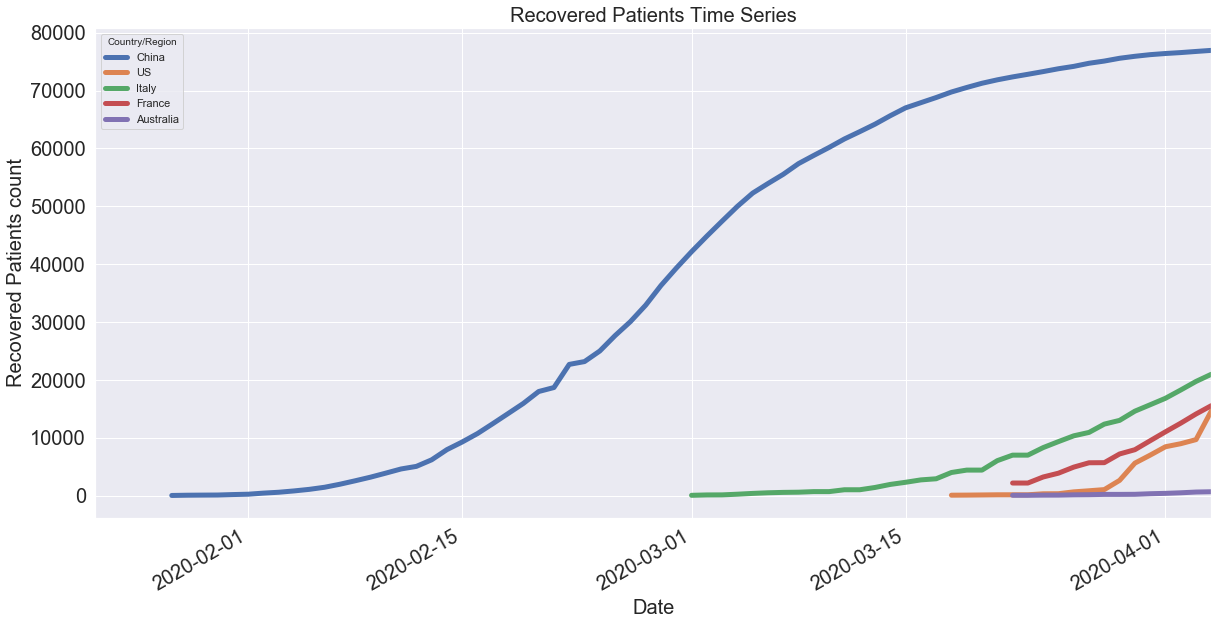

In [28]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
plot_time_series(df[poi], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)

In [29]:
clean_df = data_manipulation(df)

Albania 69
Algeria 60
Argentina 62
Australia 60
Austria 64
Bahrain 53
Belarus 70
Belgium 59
Brazil 68
Brunei 70
Burkina Faso 71
Cambodia 73
Canada 62
Chile 66
China 5
Colombia 71
Croatia 67
Czechia 70
Denmark 64
Diamond Princess 49
Ecuador 69
Egypt 60
Estonia 73
Finland 71
France 60
Germany 54
Greece 65
Hungary 73
Iceland 62
India 65
Indonesia 66
Iran 37
Iraq 59
Israel 62
Italy 39
Japan 45
Jordan 72
Korea, South 44
Kuwait 65
Lebanon 72
Luxembourg 69
Malaysia 56
Mexico 72
Morocco 72
Netherlands 67
New Zealand 66
Oman 71
Pakistan 68
Peru 68
Philippines 70
Poland 71
Portugal 71
Qatar 68
Romania 59
Russia 67
Saudi Arabia 67
Senegal 71
Singapore 32
Slovenia 71
South Africa 70
Spain 49
Sweden 70
Switzerland 60
Taiwan* 72
Thailand 62
Turkey 66
US 56
United Arab Emirates 63
United Kingdom 55
Uruguay 71
Venezuela 72
Vietnam 68


In [30]:
clean_df.head()

Country/Region,Albania,Algeria,Argentina,Australia,Austria,Bahrain,Belarus,Belgium,Brazil,Brunei,...,Switzerland,Taiwan*,Thailand,Turkey,US,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam
0,52.0,65.0,52.0,88.0,112.0,60.0,53.0,263.0,120.0,52.0,...,131.0,50.0,52.0,70.0,105.0,52.0,53.0,62.0,52.0,55.0
1,67.0,65.0,52.0,88.0,225.0,77.0,53.0,263.0,127.0,56.0,...,131.0,50.0,70.0,105.0,121.0,52.0,67.0,68.0,52.0,58.0
2,76.0,NaN,63.0,115.0,225.0,81.0,53.0,263.0,127.0,65.0,...,131.0,NaN,88.0,162.0,147.0,52.0,67.0,93.0,NaN,63.0
3,89.0,65.0,72.0,119.0,479.0,88.0,53.0,461.0,127.0,66.0,...,131.0,NaN,97.0,243.0,176.0,52.0,67.0,NaN,NaN,75.0
4,99.0,NaN,72.0,172.0,636.0,100.0,NaN,547.0,127.0,NaN,...,131.0,NaN,97.0,333.0,178.0,58.0,67.0,NaN,NaN,85.0


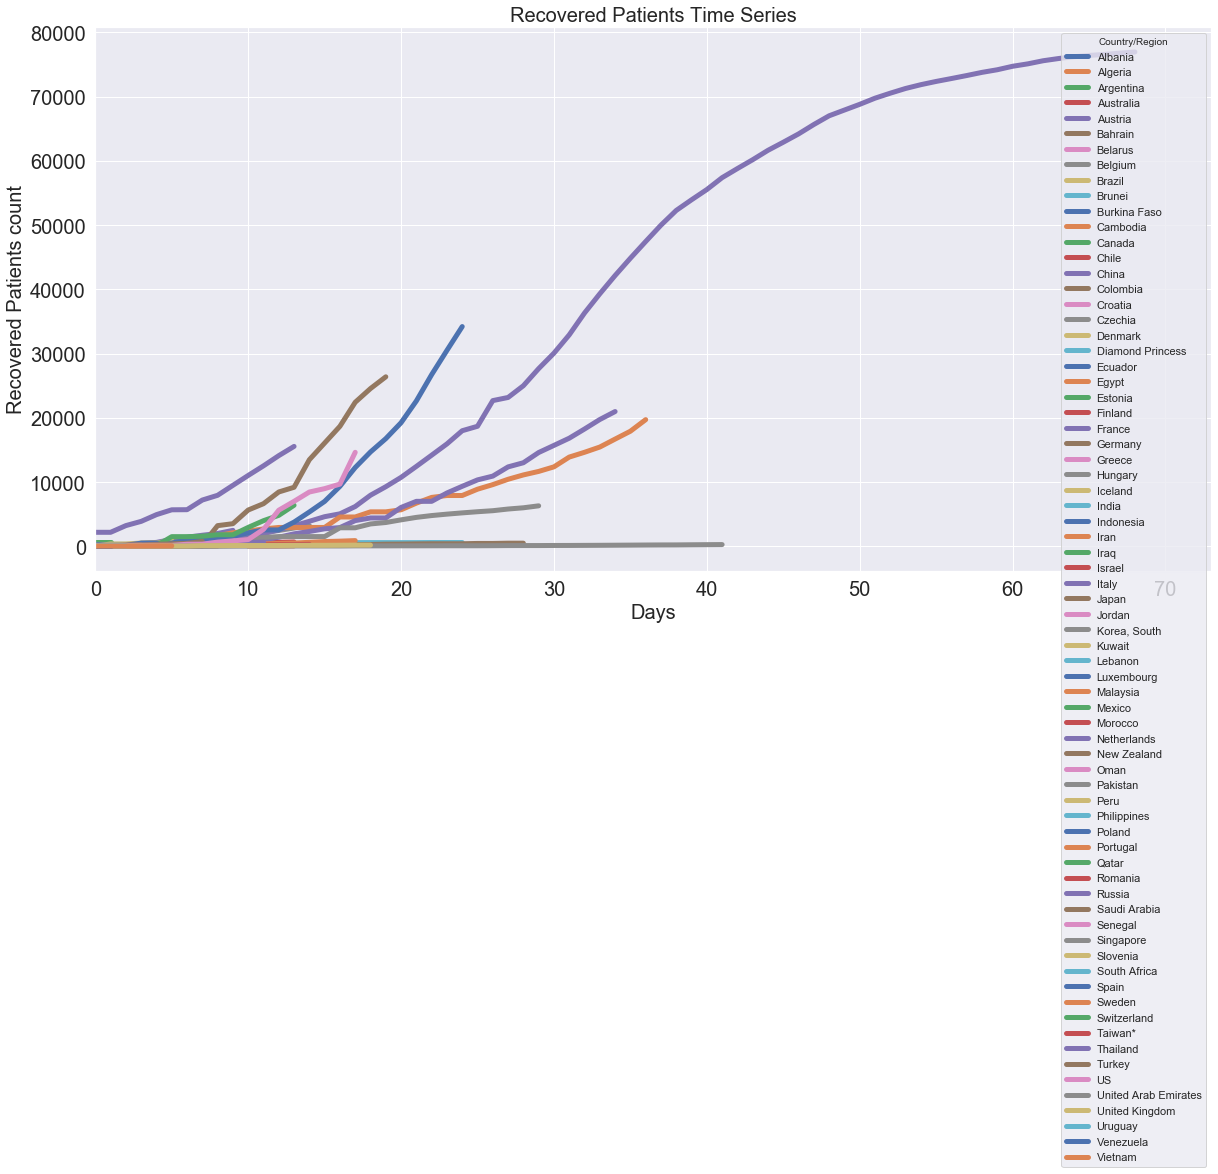

In [31]:
plot_time_series(clean_df, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', False)

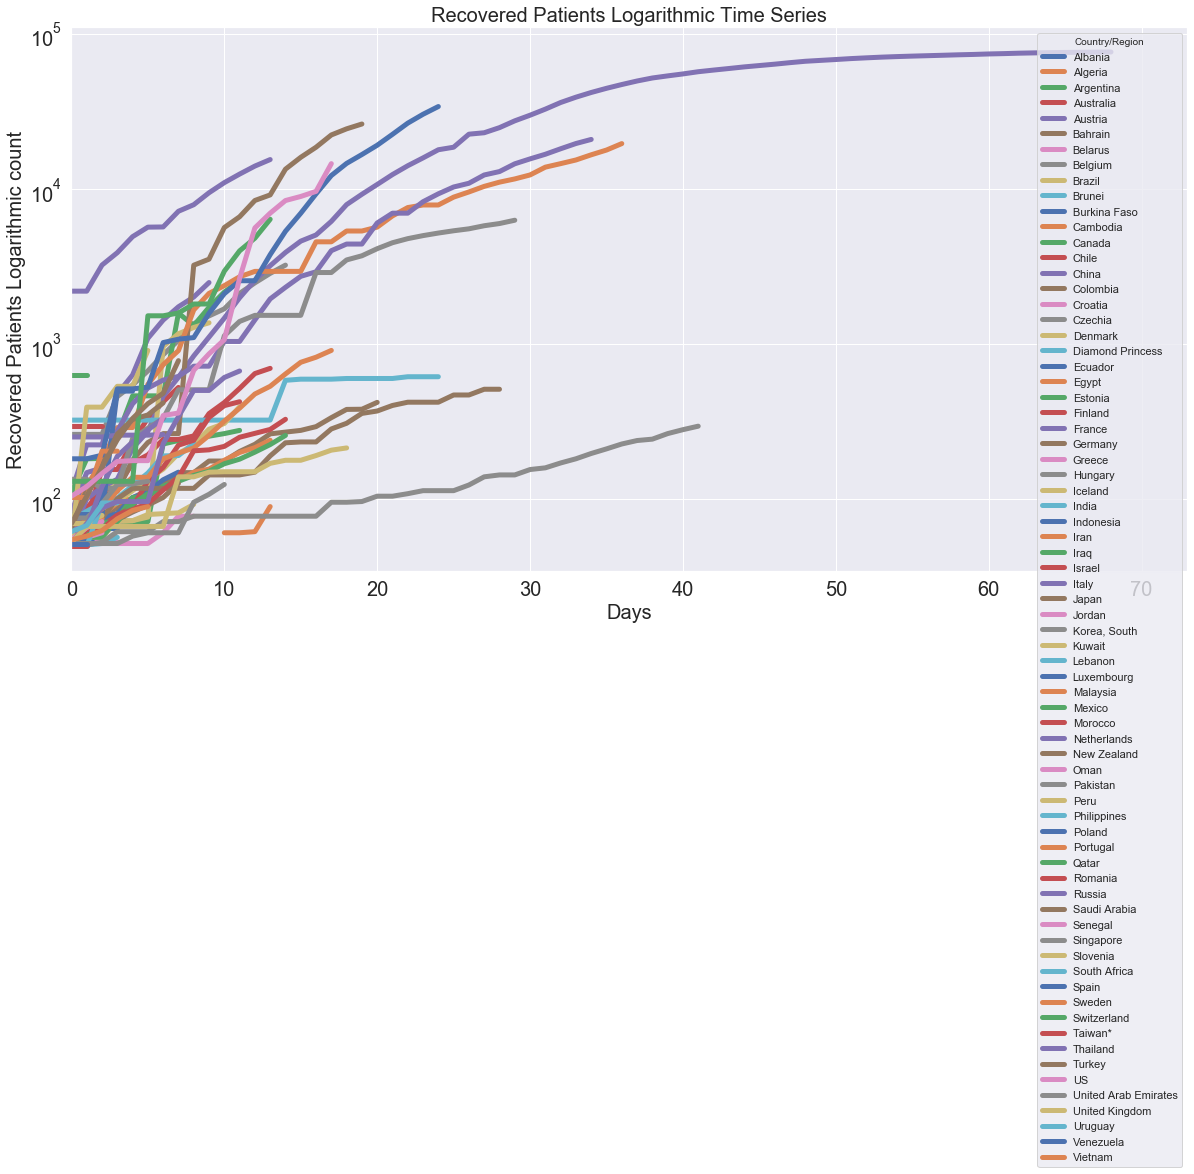

In [32]:
plot_time_series(clean_df, 'Recovered Patients Logarithmic Time Series', 'Days', 'Recovered Patients Logarithmic count', True)